# Finance Dataset Analysis - Project

In this data project we will focus on exploratory data analysis of stock prices.
<br>
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

### The Imports

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

We will get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks.


Start from creating list of Bank Tickers in alphabetical order.

In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

We want to get bank stock info from 2006 to 2016, so at first we need to define date range.

In [7]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

Now we can read bank stock data from yahoo finance using DataReader.

In [8]:
df = data.DataReader(tickers, 'yahoo', start, end)

Let's take a look at first 10 records of our dataframe.

In [9]:
df.head()

Attributes  Adj Close                                                \
Symbols           BAC           C          GS        JPM         MS   
Date                                                                  
2006-01-03  34.106033  368.265411  104.412094  26.503386  36.114262   
2006-01-04  33.743816  361.466461  102.969879  26.350430  36.139038   
2006-01-05  33.787281  363.259735  102.929413  26.430244  36.238132   
2006-01-06  33.736572  363.259735  104.387756  26.616465  36.275291   
2006-01-09  33.758301  361.541321  105.643623  27.048759  36.659302   

Attributes                 Close                                     ...  \
Symbols           WFC        BAC           C          GS        JPM  ...   
Date                                                                 ...   
2006-01-03  20.444870  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04  20.207735  46.580002  483.799988  127.089996  39.619999  ...   
2006-01-05  20.185307  46.639999  486.200012  127.040001  39.740002  ...   
2006-01-06  20.303875  46.570000  486.200012  128.839996  40.020000  ...   
2006-01-09  20.300671  46.599998  483.899994  130.389999  40.669998  ...   

Attributes        Open                                       Volume  \
Symbols             GS        JPM         MS        WFC         BAC   
Date                                                                  
2006-01-03  126.699997  39.830002  57.169998  31.600000  16296700.0   
2006-01-04  127.349998  39.779999  58.700001  31.799999  17757900.0   
2006-01-05  126.000000  39.610001  58.549999  31.500000  14970700.0   
2006-01-06  127.290001  39.919998  58.770000  31.580000  12599800.0   
2006-01-09  128.500000  39.880001  58.630001  31.674999  15619400.0   

Attributes                                                           
Symbols             C         GS         JPM         MS         WFC  
Date                                                                 
2006-01-03  1537600.0  6188700.0  12838600.0  5377000.0  11016400.0  
2006-01-04  1870960.0  4861600.0  13491500.0  7977800.0  10870000.0  
2006-01-05  1143160.0  3717400.0   8109400.0  5778000.0  10158000.0  
2006-01-06  1370210.0  4319600.0   7966900.0  6889800.0   8403800.0  
2006-01-09  1680740.0  4723500.0  16575200.0  4144500.0   5619600.0  

[5 rows x 36 columns]

We can now rename our column names.

In [113]:
df.columns.names = ['Stock Info', 'Bank Ticker']

In [12]:
df.head()

Stock Info   Adj Close                                                \
Bank Ticker        BAC           C          GS        JPM         MS   
Date                                                                   
2006-01-03   34.106033  368.265411  104.412094  26.503386  36.114262   
2006-01-04   33.743816  361.466461  102.969879  26.350430  36.139038   
2006-01-05   33.787281  363.259735  102.929413  26.430244  36.238132   
2006-01-06   33.736572  363.259735  104.387756  26.616465  36.275291   
2006-01-09   33.758301  361.541321  105.643623  27.048759  36.659302   

Stock Info                  Close                                     ...  \
Bank Ticker        WFC        BAC           C          GS        JPM  ...   
Date                                                                  ...   
2006-01-03   20.444870  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04   20.207735  46.580002  483.799988  127.089996  39.619999  ...   
2006-01-05   20.185307  46.639999  486.200012  127.040001  39.740002  ...   
2006-01-06   20.303875  46.570000  486.200012  128.839996  40.020000  ...   
2006-01-09   20.300671  46.599998  483.899994  130.389999  40.669998  ...   

Stock Info         Open                                       Volume  \
Bank Ticker          GS        JPM         MS        WFC         BAC   
Date                                                                   
2006-01-03   126.699997  39.830002  57.169998  31.600000  16296700.0   
2006-01-04   127.349998  39.779999  58.700001  31.799999  17757900.0   
2006-01-05   126.000000  39.610001  58.549999  31.500000  14970700.0   
2006-01-06   127.290001  39.919998  58.770000  31.580000  12599800.0   
2006-01-09   128.500000  39.880001  58.630001  31.674999  15619400.0   

Stock Info                                                            
Bank Ticker          C         GS         JPM         MS         WFC  
Date                                                                  
2006-01-03   1537600.0  6188700.0  12838600.0  5377000.0  11016400.0  
2006-01-04   1870960.0  4861600.0  13491500.0  7977800.0  10870000.0  
2006-01-05   1143160.0  3717400.0   8109400.0  5778000.0  10158000.0  
2006-01-06   1370210.0  4319600.0   7966900.0  6889800.0   8403800.0  
2006-01-09   1680740.0  4723500.0  16575200.0  4144500.0   5619600.0  

[5 rows x 36 columns]

# Exploring dataset


What is the max Close price for each bank's stock throughout the time period?

In [114]:
df['Close'].max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

Let's create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [19]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick + ' Return'] = df['Close'][tick].pct_change()

We can now check our new dataframe.

In [20]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


Let's create a pairplot using seaborn of the returns dataframe.

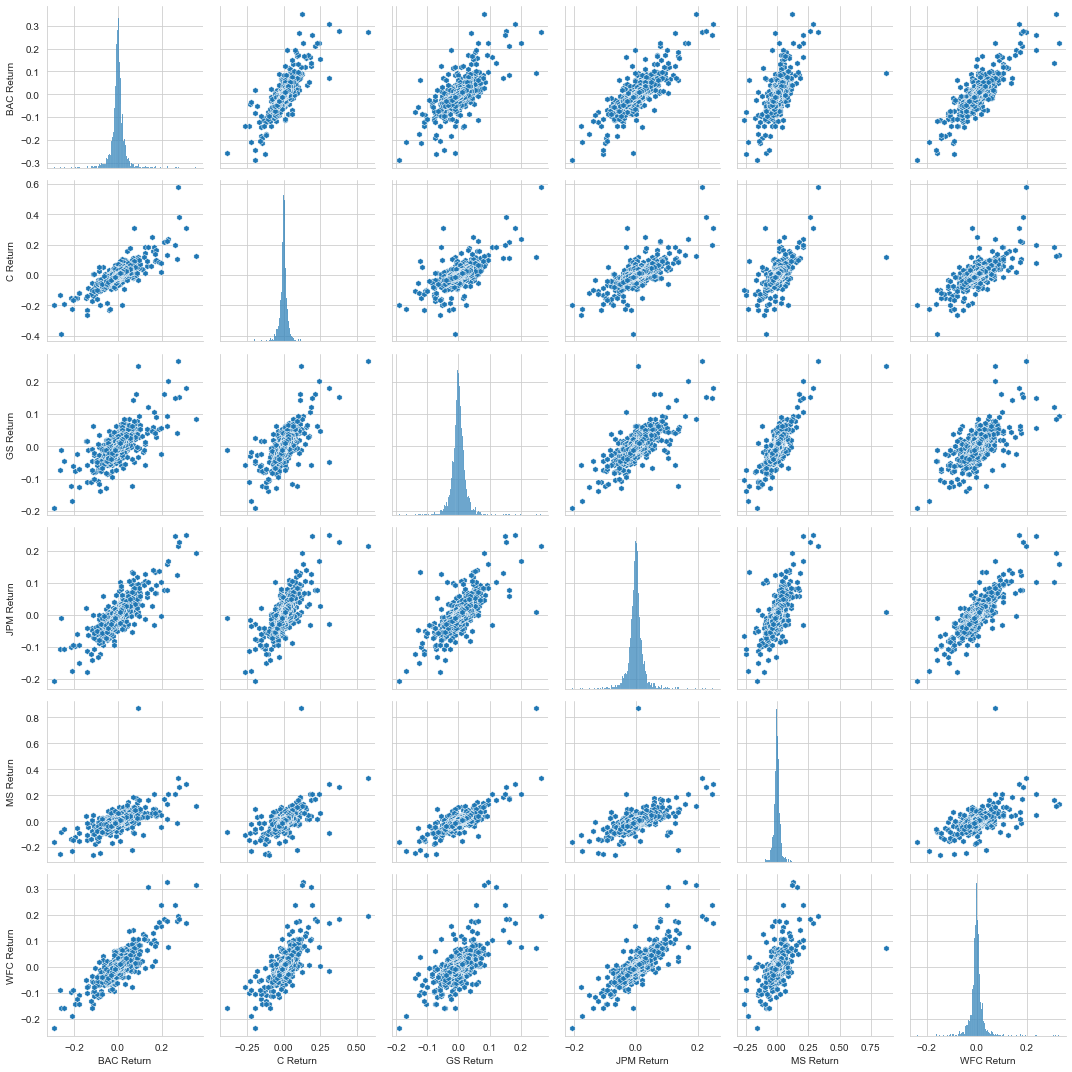

In [123]:
sns.pairplot(returns[1:], markers = 'h')
plt.tight_layout()

Figure out on what dates each bank stock had the best and worst single day returns.

In [25]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [125]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Let's take a look at the standard deviation of the returns, which stock would we classify as the riskiest over the entire time period? Which would we classify as the riskiest for the year 2015?

In [36]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

Riskest stock over the entire time period.

In [129]:
returns.std().idxmax()

'C Return'

In [130]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

Riskest stock in year 2015.

In [131]:
returns.loc['2015-01-01':'2015-12-31'].std().idxmax()

'MS Return'

# More Visualization.

Let's create a distplot of the 2015 returns for Morgan Stanley.

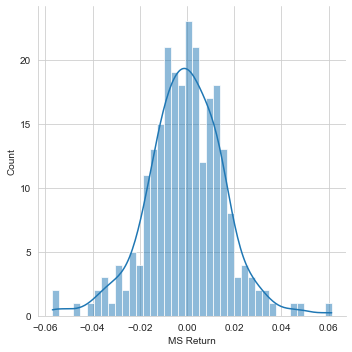

In [99]:
sns.displot(x = 'MS Return',
            data = returns.loc['2015-01-01':'2015-12-31'],
            bins = 40,
            kde= True)
plt.show()

Let's create a distplot of the 2008 returns for CitiGroup.

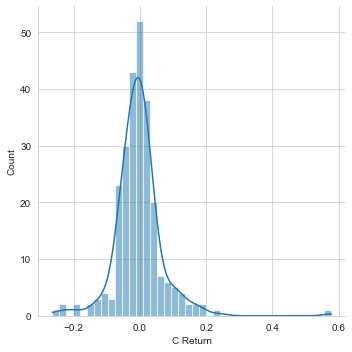

In [132]:
sns.displot(x = 'C Return',
            data = returns.loc['2008-01-01':'2008-12-31'],
            bins = 40,
            kde = True)
plt.show()

Let's create a line plot showing Close price for each bank for the entire index of time.

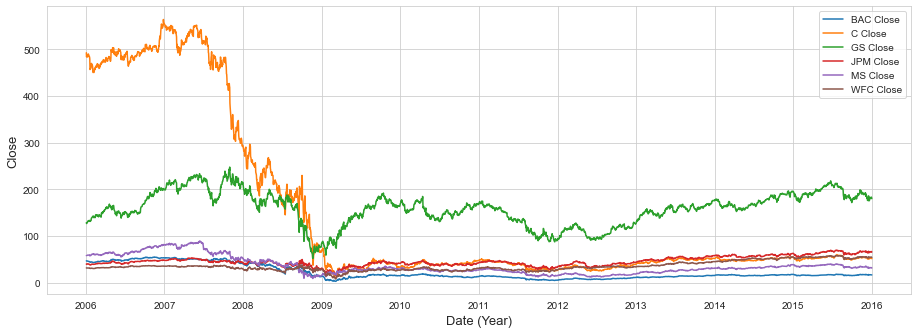

In [137]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_axes([0,0,1,1])
for tick in tickers:
    ax1.plot(df.index, df['Close'][tick],label = tick + ' Close')
    
plt.legend(loc = 0)
plt.xlabel("Date (Year)", fontsize = 13)
plt.ylabel('Close', fontsize = 13)
plt.show()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008.

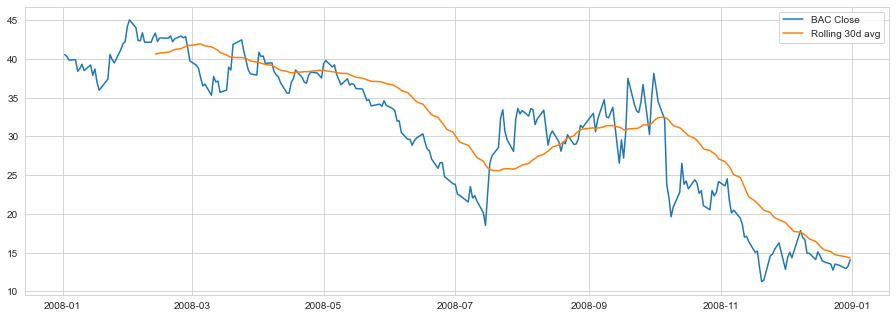

In [69]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(df.loc['2008-01-01':'2008-12-31'].index,
         df.loc['2008-01-01':'2008-12-31']['Close']['BAC'],
         label = 'BAC Close' )

ax1.plot(df.loc['2008-01-01':'2008-12-31'].index,
         df.loc['2008-01-01':'2008-12-31']['Close']['BAC'].rolling(window = 30).mean(),
         label = 'Rolling 30d avg')

plt.legend(loc = 0)
plt.show()


Now, create a heatmap of the correlation between the stocks Close Price.

In [142]:
close_corr = df['Close'].corr()
close_corr.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835


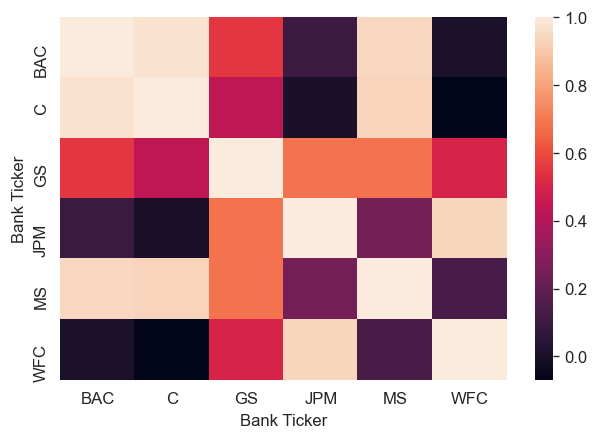

In [77]:
plt.figure(dpi = 120)
sns.heatmap(close_corr)
plt.show()

Let's use seaborn's clustermap to cluster the correlations together.

<Figure size 720x480 with 0 Axes>

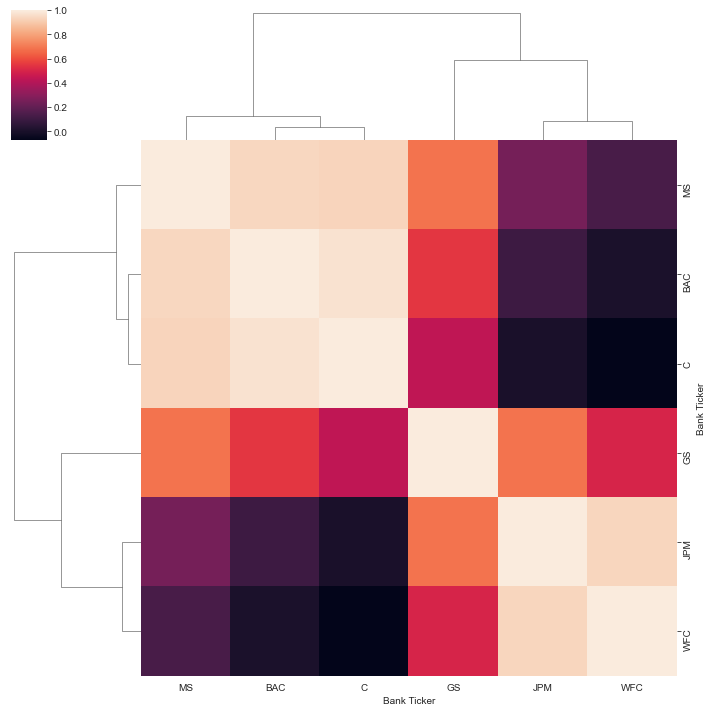

In [149]:
plt.figure(dpi = 120)
sns.clustermap(close_corr)
plt.show()